In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
df = pd.read_excel("C:/Users/user/Downloads/beast123.xlsx")

In [3]:
close_df=pd.DataFrame(df["Futures"])
close_df = close_df.join(df["ETF.price"])

In [4]:
close_df

,Futures,ETF.price
0,15.768,15.5300
1,16.213,15.9001
2,16.637,16.2700
3,16.544,16.3200
4,16.385,16.0500
...,...,...
1482,24.048,23.3200
1483,24.363,23.3800
1484,23.633,22.8000
1485,23.300,22.4600


# 回測Model

In [5]:
stock_1='Futures'
stock_2='ETF.price'

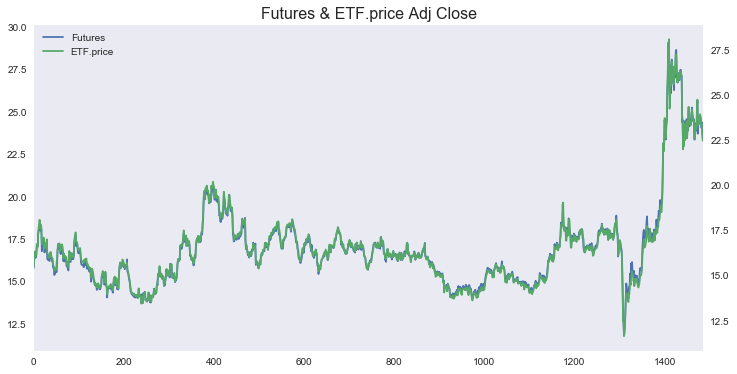

In [6]:
plt.figure(figsize=(12,6))
ax=close_df[stock_1].plot()
ax2=close_df[stock_2].plot(secondary_y=True)
plt.grid()
lines = ax.get_lines() + ax2.get_lines()

plt.legend(lines, [l.get_label() for l in lines])
plt.title('{} & {} Adj Close'.format(stock_1,stock_2),fontsize=16);

In [7]:
#計算價差比例
Spread_Ratio=close_df[stock_1]/close_df[stock_2]
Spread_Ratio_Mean=Spread_Ratio.mean()
Spread_Ratio_Std=Spread_Ratio.std()


In [8]:
Spread_Ratio

0       1.015325
1       1.019679
2       1.022557
3       1.013725
4       1.020872
          ...   
1482    1.031218
1483    1.042044
1484    1.036535
1485    1.037400
1486    1.035091
Length: 1487, dtype: float64

In [9]:
window=20
upcrit=1
downcrit =1
Spread_Ratio_MA=Spread_Ratio.rolling(window=window).mean()
Spread_Ratio_rolling_Std=Spread_Ratio.rolling(window=window).std()
upper_bound=Spread_Ratio_MA+upcrit*(Spread_Ratio_rolling_Std)
upper_bound2=Spread_Ratio_MA+(0.5*upcrit*(Spread_Ratio_rolling_Std))

lower_bound=Spread_Ratio_MA-downcrit*(Spread_Ratio_rolling_Std)
lower_bound2=Spread_Ratio_MA-(downcrit*0.5*(Spread_Ratio_rolling_Std))



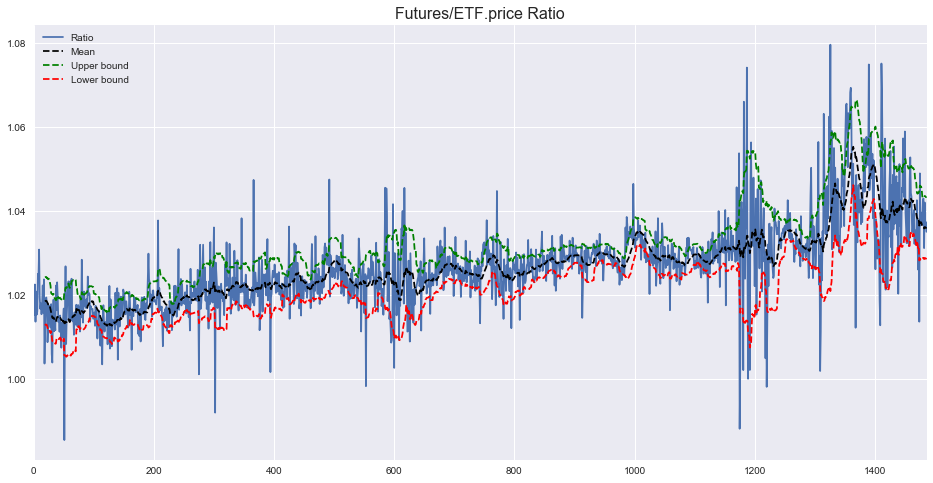

In [10]:
plt.figure(figsize=(16,8))
Spread_Ratio.plot(label='Ratio')
plt.title('{}/{} Ratio'.format(stock_1,stock_2),fontsize=16);
Spread_Ratio_MA.plot(label='Mean',ls='--',c='black')
upper_bound.plot(label='Upper bound',ls='--',c='g')
lower_bound.plot(label='Lower bound',ls='--',c='r');

plt.legend();

# 看這個

In [11]:
#計算交易訊號
signal = np.zeros(len(Spread_Ratio))
days = 2
iteration = range(1,1486)
for i in iteration :

    up1 = (Spread_Ratio[i] >= upper_bound[i])
    down1 = (Spread_Ratio[i] < upper_bound2[i])
    up2 = (Spread_Ratio[i] > lower_bound2[i]) 
    down2 = (Spread_Ratio[i] <= lower_bound[i]) 
    
    if (up1 and (sum(signal[0:(i)]) == 0) ) == True:
        signal[i] = -1
    elif (up1 and (sum(signal[0:(i)]) == 1) ) == True:
        signal[i] = -2
#     elif ((sum(signal[0:(i-days+1)]) == -1)  and (signal[i] == 0) and (signal[i-1] == 0)) == True:
#         signal[i] = 1
    elif (down1 and (sum(signal[0:(i)]) == -1))== True:
        signal[i] = 1 ##ok
        
    elif (down2 and (sum(signal[0:(i)]) ==0 ) )  == True:
        signal[i] = 1
        
    elif (down2 and (sum(signal[0:(i)]) == -1 ) )  == True:
        signal[i] = 2
        
    elif (up2 and (sum(signal[0:(i)])== 1)) == True:
        signal[i] = -1 ##ok
        
#     elif ((close_df[stock_1][i] == min(close_df[stock_1][(i-3):i])) and (sum(signal[0:(i)]) > 0)) == True:
#         signal[i] = -1
#     elif ((close_df[stock_1][i] == max(close_df[stock_1][(i-3):i])) and (sum(signal[0:(i)]) < 0)) == True:
#         signal[i] = 1
# # for i in iteration:

#     elif ((sum(signal[0:(i-days+1)]) == -1)  and (signal[i] == 0) ) == True:
#         signal[i] = 1
#     elif ((sum(signal[0:(i-days+1)]) ==1) and (signal[i] == 0)  ) == True:
#         signal[i] = -1
#     elif ( sum(signal[0:(i+1)]) == signal[i])== True:
#         signal[i] = 0
#     else:
#         signal[i] = 0
        
if sum(signal) == 1 :
    signal[-1] = -1
elif sum(signal) == -1:
    signal[-1] = 1
elif sum(signal) == -2:
    signal[-1] = 2
elif sum(signal) == 2:
    signal[-1] = -2
else : 
    signal[-1] =0


In [12]:
sum(signal)
  

0.0

In [13]:
signal_df=pd.Series(signal,index=Spread_Ratio.index)



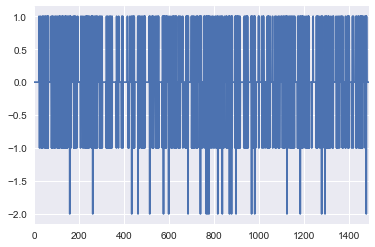

In [14]:
signal_df.plot()

In [15]:
position_df=signal_df.shift(1).cumsum()
ssignal_df=signal_df.shift(1)
spread_df = Spread_Ratio.shift(1)

In [16]:
#計算多空部位


pd.DataFrame(position_df)

,0
0,NaN
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1482,0.0
1483,0.0
1484,0.0
1485,0.0


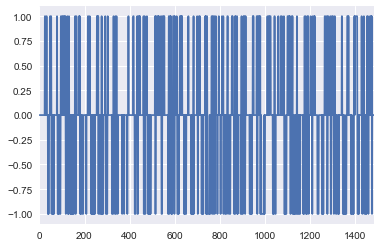

In [17]:
position_df.plot()

In [18]:

wealth_1 = 1000000
hold_number1=0
short_number1=0

signal_df_2 = -signal_df


In [19]:
signal_df

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1482    0.0
1483    0.0
1484    0.0
1485    0.0
1486    0.0
Length: 1487, dtype: float64

In [20]:
##先存買賣當天的價格乘上方向性

trade_stock_df=pd.concat([(np.sign(signal_df)*close_df[stock_1]).shift(1),(np.sign(signal_df_2)*close_df[stock_2]).shift(1)],axis=1,keys=[stock_1,stock_2])
volumn = pd.concat([0*close_df[stock_1].shift(1),(0*close_df[stock_2]).shift(1)],axis=1,keys=[stock_1,stock_2])

In [21]:
position_df

0       NaN
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1482    0.0
1483    0.0
1484    0.0
1485    0.0
1486    0.0
Length: 1487, dtype: float64

In [22]:
wealth_1 = close_df[stock_1]*0
wealth_1[0] = 1000000
print(wealth_1)

0       1000000.0
1             0.0
2             0.0
3             0.0
4             0.0
          ...    
1482          0.0
1483          0.0
1484          0.0
1485          0.0
1486          0.0
Name: Futures, Length: 1487, dtype: float64


In [23]:
#計算交易股數
iteration = range(1,1486)
for i in iteration:
    if (trade_stock_df[stock_1][i] > 0 and position_df[i-1] == 0 )==True:
        volumn[stock_1][i] = (wealth_1[i-1]*0.998)/trade_stock_df[stock_1][i]
        wealth_1[i] =  wealth_1[i-1] - volumn[stock_1][i]*trade_stock_df[stock_1][i]
        
        
    elif (trade_stock_df[stock_1][i] > 0 and position_df[i-1] == -1 )==True:
        volumn[stock_1][i] = -ssignal_df[i]*sum(volumn[stock_1][1:(i)])
        wealth_1[i] = wealth_1[i-1] -(volumn[stock_1][i]*trade_stock_df[stock_1][i]*ssignal_df[i])##short = -
        
       
        
    elif (trade_stock_df[stock_1][i]<0 and position_df[i-1]==0) ==True:
        volumn[stock_1][i] = 0.998*wealth_1[i-1]/trade_stock_df[stock_1][i]
        wealth_1[i] = wealth_1[i-1] + volumn[stock_1][i]*trade_stock_df[stock_1][i]
        
        
    elif (trade_stock_df[stock_1][i] < 0 and position_df[i-1]== 1 )==True:
        volumn[stock_1][i] = sum(volumn[stock_1][1:(i)])*ssignal_df[i]
        wealth_1[i] = ssignal_df[i]*(0.998 * sum(volumn[stock_1][1:(i)]) *trade_stock_df[stock_1][i])+wealth_1[i-1]
    
    else:
        wealth_1[i] = wealth_1[i-1]
        volumn[stock_1][i] = 0
        
    volumn[stock_2][i] = -volumn[stock_1][i]*(spread_df[i]) 

In [24]:
return_df=pd.concat([(close_df[stock_1]).diff(1),(close_df[stock_2]).diff(1)],axis=1,keys=[stock_1,stock_2])

In [25]:
return_df

,Futures,ETF.price
0,NaN,NaN
1,0.445,0.3701
2,0.424,0.3699
3,-0.093,0.0500
4,-0.159,-0.2700
...,...,...
1482,-0.400,-0.1200
1483,0.315,0.0600
1484,-0.730,-0.5800
1485,-0.333,-0.3400


In [26]:
(return_df*volumn).cumsum()

,Futures,ETF.price
0,NaN,NaN
1,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00
...,...,...
1482,1.136328e+07,1.943252e+06
1483,1.136328e+07,1.943252e+06
1484,1.136328e+07,1.943252e+06
1485,1.136328e+07,1.943252e+06


In [27]:
trade_return_df=(return_df*volumn)
cum_trade_return_df=(return_df*volumn).cumsum()
cum_trade_return_df['Total Return']=cum_trade_return_df.sum(axis=1)

cum_trade_return_df['Total Return']


0       0.000000e+00
1       0.000000e+00
2       0.000000e+00
3       0.000000e+00
4       0.000000e+00
            ...     
1482    1.330654e+07
1483    1.330654e+07
1484    1.330654e+07
1485    1.330654e+07
1486    1.330654e+07
Name: Total Return, Length: 1487, dtype: float64

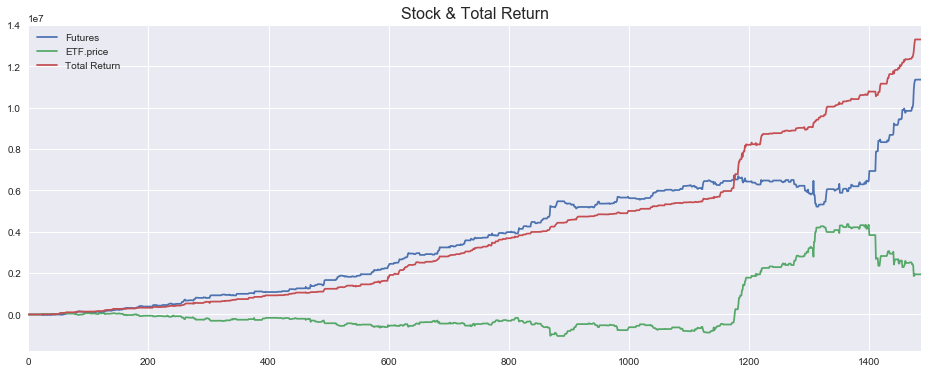

In [28]:
fig,ax=plt.subplots(figsize=(16,6))

cum_trade_return_df.plot(label='Total Return',ax=ax)
plt.legend()
plt.title('Stock & Total Return',fontsize=16);

In [29]:
cum_trade_percent_return=(cum_trade_return_df['Total Return']/(2000000))*100

Text(0.5, 1.0, 'Cumulative Return')

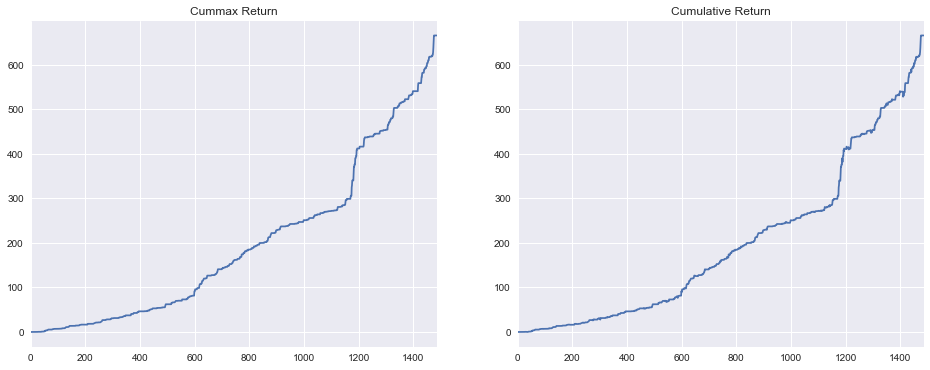

In [30]:
fig=plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
cum_trade_percent_return.cummax().plot()
plt.title('Cummax Return')
plt.subplot(1,2,2)
cum_trade_percent_return.plot()
plt.title('Cumulative Return')

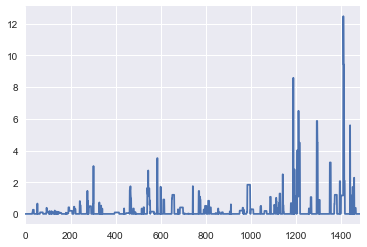

In [31]:
MDD_series=cum_trade_percent_return.cummax()-cum_trade_percent_return
MDD_series.plot()


In [32]:
high_index=cum_trade_percent_return[cum_trade_percent_return.cummax()==cum_trade_percent_return].index

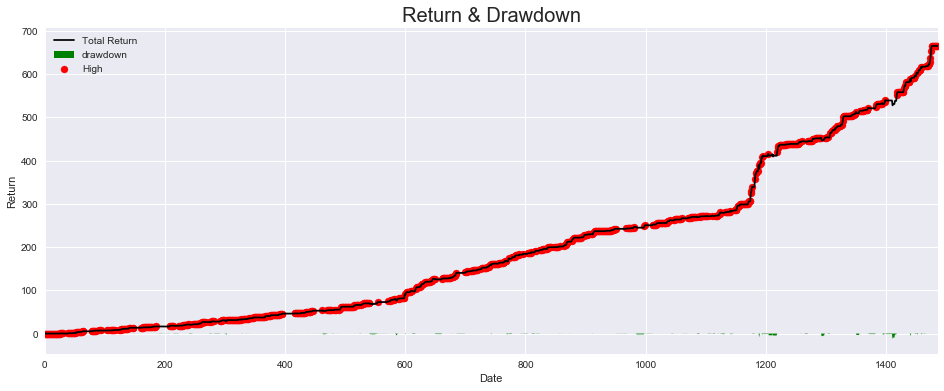

In [33]:
fig,ax=plt.subplots(figsize=(16,6))

(cum_trade_percent_return).plot(label='Total Return',ax=ax,c='black')
plt.fill_between(MDD_series.index,-MDD_series,0,facecolor='green',label='drawdown')
plt.scatter(high_index,cum_trade_percent_return.loc[high_index],c='r',label='High')

plt.legend()
plt.ylabel('Return')
plt.xlabel('Date')
plt.title('Return & Drawdown',fontsize=20);


In [34]:
MDD=round(MDD_series.max(),2)
Cumulative_Return=round(cum_trade_percent_return.iloc[-1],2)
Return_on_MDD=round(cum_trade_percent_return.iloc[-1]/MDD_series.max(),2)
daily_return=cum_trade_percent_return.diff(1)
print('Cumulative Return: {}%'.format(Cumulative_Return))
print('MDD: {}%'.format(MDD))
print('Return on MDD: {}'.format(Return_on_MDD))
print('Shapre Ratio: {}'.format(round((daily_return.mean()/daily_return.std())*pow(252,0.5),2)))

Cumulative Return: 665.33%
MDD: 12.47%
Return on MDD: 53.34
Shapre Ratio: 4.04


In [35]:
abs(position_df.diff(1)).sum()*0.005650*100

307.36

In [36]:
len(position_df[((position_df!=0) ==True)])/len(position_df)

0.3140551445864156

In [37]:
volumn[stock_1]

0       NaN
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1482    0.0
1483    0.0
1484    0.0
1485    0.0
1486    0.0
Name: Futures, Length: 1487, dtype: float64